In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
data=pd.read_csv('cyberbullying_tweets.csv')
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


### Data Cleaning and EDA

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [56]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [57]:
data.duplicated().sum()

36

In [58]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [59]:
data['cyberbullying_type'].value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cyberbullying_type', ylabel='count'>

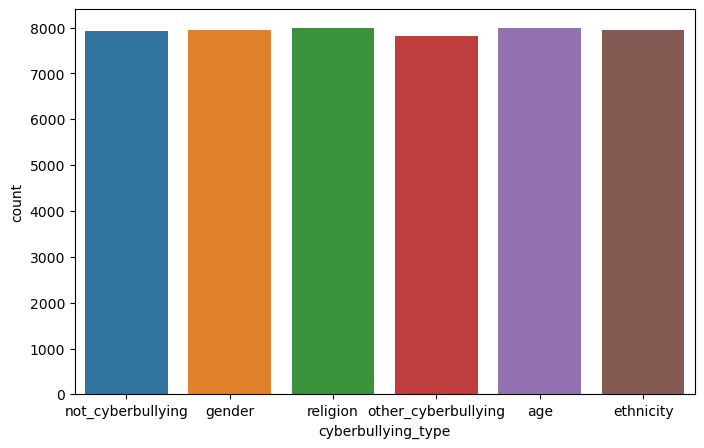

In [60]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(data['cyberbullying_type'],ax=ax)

We can see that all classes have similar no.of samples<br>
Hence, the dataset is balanced!

#### Encoding categories 

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

data['cyberbully_type_encoded']=label_encoder.fit_transform(data['cyberbullying_type'])
data[['cyberbullying_type','cyberbully_type_encoded']].value_counts()

cyberbullying_type   cyberbully_type_encoded
religion             5                          7997
age                  0                          7992
ethnicity            1                          7959
gender               2                          7948
not_cyberbullying    3                          7937
other_cyberbullying  4                          7823
dtype: int64

In [62]:
data.sample(10)

,tweet_text,cyberbullying_type,cyberbully_type_encoded
34228,A little over halfway through Worlds Worst Par...,age,0
32982,Just admit you want to live out you high schoo...,age,0
45786,In 2 days I've seen 2 black males put hands on...,ethnicity,1
10328,RT @MeninistTweet: Girls are ruthless smh http...,gender,2
16270,If you open the quran you can read the violent...,religion,5
31702,you're tacky and I hate you #schoolofrock,other_cyberbullying,4
42774,dumb ass niggers still eating pussy? HILARIOUS...,ethnicity,1
7869,Can Kat and Andre go already? #theycantcook #MKR,not_cyberbullying,3
1140,Hurry up! Kat and Andre are dicks #mkr,not_cyberbullying,3
3458,Kat and Andre do not deserve to be in the comp...,not_cyberbullying,3


### Text Preprocessing

In [63]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS=set(stopwordlist)

In [64]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()

def preprocess(x):
    tweet=re.sub('[^a-zA-Z]',' ',x)
    tweet=tweet.lower()
    tweet=tweet.split()
    text=[ps.stem(word) for word in tweet if word not in STOPWORDS]
    text=' '.join(text)
    return text
data['text']=data['tweet_text'].apply(preprocess)

In [65]:
data.tail(5)

,tweet_text,cyberbullying_type,cyberbully_type_encoded,text
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1,black ppl aren expect anyth depend anyth yet f...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1,turner not withhold disappoint turner call cou...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1,yea fuck rt therealexel nigger fuck unfollow f...
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,1,bro u gotta chill rt chillshrammi dog fuck kp ...


In [66]:
from sklearn.model_selection import train_test_split
X=data['text']
y=data['cyberbully_type_encoded']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40,test_size=0.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((38124,), (38124,), (9532,), (9532,))

In [67]:
y_train.value_counts()

5    6396
0    6383
2    6371
3    6369
1    6337
4    6268
Name: cyberbully_type_encoded, dtype: int64

In [68]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500000,ngram_range=(1,2))
# tfidf.vocabulary_

#### Word Cloud

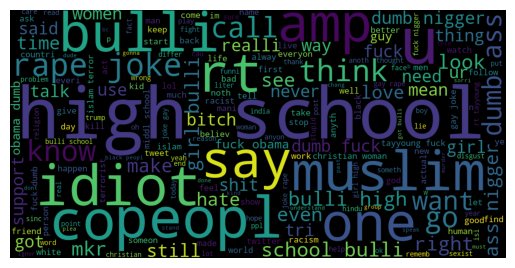

In [18]:
text=' '.join(X)

from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can see from the wordcloud that there were frequent tweets about:
1. Muslim religion
2. High School 
3. people appearance, etc.

### Model Building

In [69]:
# tfidf.fit(X_train)
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)
X_train.shape,X_test.shape

((38124, 339211), (9532, 339211))

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model_knn=knn.fit(X_train,y_train)
y_knn=model_knn.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_knn,y_test))

0.2197859840537138


In [79]:
print(classification_report(y_knn,y_test))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10        85
           1       0.18      0.99      0.31       303
           2       0.08      0.92      0.14       132
           3       0.03      0.60      0.05        70
           4       0.98      0.17      0.29      8926
           5       0.01      1.00      0.02        16

    accuracy                           0.22      9532
   macro avg       0.22      0.78      0.15      9532
weighted avg       0.93      0.22      0.29      9532



In [70]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=1)
model_svc=svc.fit(X_train,y_train)

In [72]:
y_svc=model_svc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_svc,y_test))

0.8345572807385648


In [73]:
print(classification_report(y_svc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1728
           1       0.99      0.96      0.97      1671
           2       0.88      0.91      0.89      1517
           3       0.52      0.63      0.57      1300
           4       0.66      0.61      0.64      1672
           5       0.97      0.94      0.95      1644

    accuracy                           0.83      9532
   macro avg       0.83      0.83      0.83      9532
weighted avg       0.84      0.83      0.84      9532



In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(X_train,y_train)
y_lr=model_lr.predict(X_test)

C:\Users\OWNER'S\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
print(accuracy_score(y_lr,y_test))

0.823017205203525


In [76]:
print(classification_report(y_lr,y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1754
           1       0.99      0.96      0.97      1662
           2       0.85      0.90      0.87      1487
           3       0.53      0.61      0.57      1363
           4       0.62      0.60      0.61      1617
           5       0.96      0.93      0.94      1649

    accuracy                           0.82      9532
   macro avg       0.82      0.82      0.82      9532
weighted avg       0.83      0.82      0.83      9532



In [26]:
y_svc[0]

1

In [80]:
import pickle
pickle.dump(tfidf,open('tfidf.pickle','wb'))
#pickling the best model among all
pickle.dump(model_svc,open('svc.pickle','wb'))